### Importing Libraries

In [94]:
import numpy as np                                          #Importing package numpys (For Numerical Python)
import pandas as pd                                         #Importing for panel data analysis
pd.set_option('display.max_columns', None)                  # Unfolding hidden features if the cardinality is high
#---------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                             #Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                       # Backend used for rendering and GUI integration
import seaborn as sns                                       #Importin seaborm library for interactive visualization
%matplotlib inline
#---------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### Data Acquisition & Description

- This database was created to identify whether a customer will be interested in recommended policy based on user provided data.

- The column response is also present in the dataset which has two values 1 and 0.

- This is the data that we have to predict for future samples.

- DataSet:
    - The dataset contains 50882 rows and 14 columns.
    - The last column response is the target variable.

The dataset provided for this project includes the following features:

| Feature                 | Description                                                   |
|-------------------------|---------------------------------------------------------------|
| Customer Id             | Unique identifier for each customer                           |
| City_Code               | Code representing the customer's city                          |
| Region_Code             | Code representing the customer's region                        |
| Accommodation_Type      | Type of accommodation (e.g., owned, rented)                    |
| Reco_Insurance_Type     | Recommended insurance type (e.g., joint, single)               |
| Upper_Age               | Upper age of the customer                                      |
| Lower_Age               | Lower age of the customer                                      |
| Is_Spouse               | Customer's relation (in case of a joint policy)                |
| Health Indicator        | Current health indicator category                              |
| Holding_Policy_Duration | Duration of the current holding policy                         |
| Reco_Policy_Cat         | Recommended policy category                                   |
| Holding_Policy_Type     | Current holding policy type                                    |
| Reco_Policy_Premium     | Recommended policy premium price                              |
| Response                | Customer's response towards the proposed health policy (target variable: 1 indicates interest, 0 indicates no interest) |


In [95]:
#Read and load data
health = pd.read_csv('train_data.csv')
#shape of data
print('shape of data:', health.shape)
#Display data
health.head()

shape of data: (50882, 14)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [96]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

### Checking missing values

In [97]:
health.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

#### Observation:
- There are 3 columns with missing data:
    - Health Indicator           -11691
    - Holding_Policy_Duration    -20251
    - Holding_Policy_Type        -20251
- now we'll check each column to treat missing data

In [98]:
health['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

- As we can see different categories under health indicator so will create another category for missing data

In [99]:
health['Health Indicator'] = health['Health Indicator'].fillna('X0')

In [100]:
health['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

- Here is also different categories present in 'Holding_Policy_Duration' so will make another category for missing data
- and also will replace 14+ as 15
- change datatype from object to int

In [101]:
health['Holding_Policy_Duration'] = health['Holding_Policy_Duration'].fillna(0)

In [102]:
health['Holding_Policy_Duration'] = health['Holding_Policy_Duration'].replace('14+', 15)

In [103]:
health['Holding_Policy_Duration'] = health['Holding_Policy_Duration'].astype(float).astype(int)

In [104]:
health['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

- Again will create another category for missing data in 'Holding_Policy_Type'
- change datatype from float to object

In [105]:
health['Holding_Policy_Type'] = health['Holding_Policy_Type'].fillna(0)

In [106]:
health['Holding_Policy_Type'] = health['Holding_Policy_Type'].astype(str)

####  Check for duplicates

In [107]:
health.duplicated().any()

False

- No duplicates found

#### Let's explore each column for feature engineering and exploratory data analysis

In [108]:
health.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

- Will drop 'ID', 'Region_Code' as they are of no use

#### Response

In [109]:
# health['Response'] = health['Response'].astype(str)

In [110]:
health['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

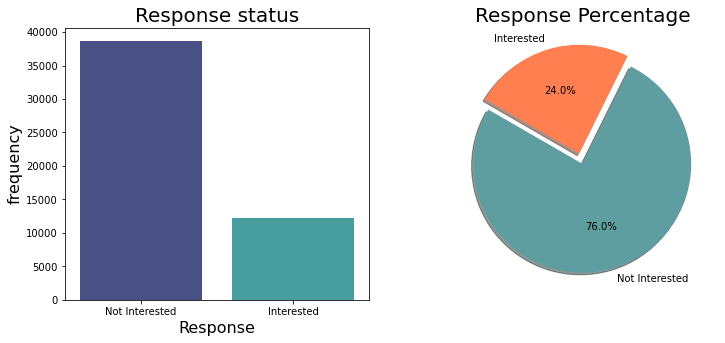

In [111]:
fig, ax = plt.subplots(1,2, figsize = (12,5))

#count plot
sns.countplot(x= 'Response' , data = health, palette = 'mako', ax=ax[0])
ax[0].set_title('Response status' , size =20)
ax[0].set_xlabel('Response', size = 16)
ax[0].set_ylabel('frequency', size = 16)
ax[0].set_xticks(ticks = [0, 1], labels = ['Not Interested', 'Interested'])

#pie plot
ax[1].pie(health['Response'].value_counts(), labels = ['Not Interested', 'Interested'], explode = (0, 0.1),
         autopct='%2.1f%%', 
        shadow=True, startangle=150, colors=['#5F9EA0', '#FF7F50'])
# ax[1].axis('equal')
ax[1].set_title('Response Percentage', size = 20)

plt.show()

#### Interpretation:
- With bar chart and pie plot we can see that mojority of people are **not interested** with **76%** as compare to **interested** with only **24%**
- will do further Analysis to see which features can contribute more in recommendation process to filter out intrested people.
- because data is imbalanced so will synthesize the data

#### City Code

<AxesSubplot:>

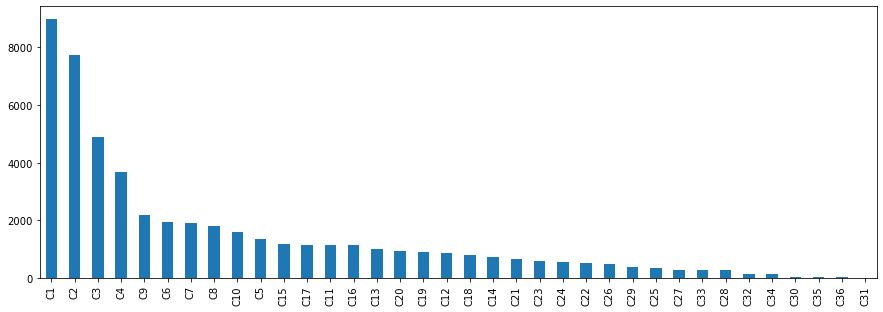

In [112]:
plt.figure(figsize = (15,5))
health['City_Code'].value_counts().sort_values(ascending = False).plot.bar()

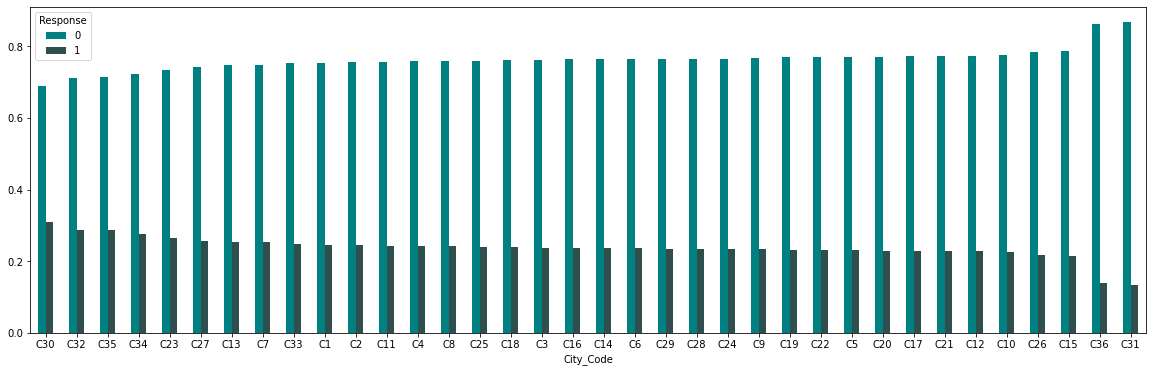

In [113]:
fig, ax = plt.subplots(figsize=(20,6))
pd.crosstab(health['City_Code'], health['Response'], normalize='index').sort_values(1, ascending=False).plot.bar(ax=ax, color=['teal', 'darkslategray'])
plt.xticks(rotation='horizontal')
plt.show()

#### Interpretation:
- The 'City_Code' column represents different city codes, with 'C1' being the most frequent city code (occurring 8,973 times) followed by 'C2' (7,747 times) and 'C3' (4,889 times).
- Cities with higher proportions of positive responses are more likely to have positive outcomes compared to negative outcomes.
    - For example, 'C30' has a positive response proportion of 31.03%, indicating that approximately 31.03% of the responses from that city code are positive.
    - On the other hand, 'C31' has a relatively lower positive response proportion of 13.33%, suggesting that only 13.33% of the responses from that city code are positive.

#### Accomodation_Type and Response

In [114]:
health['Accomodation_Type'].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

<Figure size 720x360 with 0 Axes>

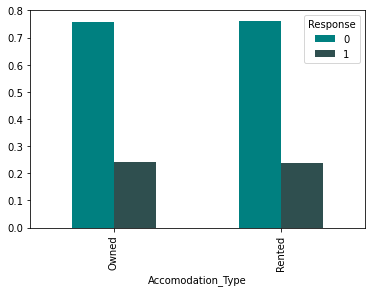

In [115]:
plt.figure(figsize=(10,5))
pd.crosstab(health['Accomodation_Type'], health['Response'], normalize='index').sort_values(1, ascending = False).plot.bar(color=['teal', 'darkslategray'])
plt.show()

#### Interpretation:
- The grouped bar chart of 'Accommodation_Type' and 'Response' highlights that the category of clients who own accommodation has a higher count of positive responses. This finding suggests that the clients who own their accommodation are more likely to show interest in the proposed health policy.

#### Reco_Insurance_Type and Response

In [116]:
health['Reco_Insurance_Type'].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

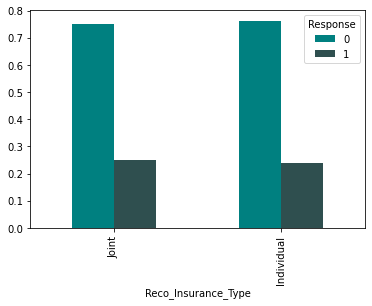

In [117]:
pd.crosstab(health['Reco_Insurance_Type'], health['Response'], normalize='index').sort_values(1, ascending = False).plot.bar(color=['teal', 'darkslategray'])
plt.show()

#### Interpretation:
- The majority of customers in the dataset are interested in individual insurance policies.

#### Upper_Age and Lower_Age

In [118]:
health['Avg_Age'] = (health['Upper_Age'] + health['Lower_Age']) / 2

To reflect the pricing aspect of insurance products based on applicants' age, we can create an average age feature. This feature replaces the original upper and lower age features, simplifying the dataset structure while capturing the age range. By calculating the average age and dropping the individual age columns, we retain essential age-related information aligned with industry practices.

In [119]:
health['Avg_Age'].describe()

count    50882.000000
mean        43.797571
std         16.971142
min         17.500000
25%         28.000000
50%         42.000000
75%         58.000000
max         75.000000
Name: Avg_Age, dtype: float64

<AxesSubplot:xlabel='Avg_Age', ylabel='Count'>

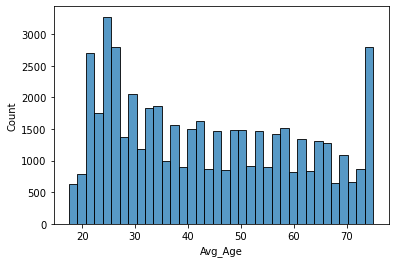

In [120]:
sns.histplot(health['Avg_Age'])

In [121]:
health.groupby(['Response'])['Avg_Age'].mean()

Response
0    43.794301
1    43.807929
Name: Avg_Age, dtype: float64

#### Interpretation:
- the average age across the dataset is approximately 43.8.
- the standard deviation is approximately 16.97, suggesting that the ages in the dataset have a moderate amount of variation around the mean.
- the youngest recorded age in the dataset is 17.5.
- 50% of the values in the dataset are less than or equal to 42
- oldest recorded age in the dataset is 75.
- The mean age for customers who responded with '0' (not interested in the health policy) is approximately 43.79, while the mean age for customers who responded with '1' (interested in the health policy) is approximately 43.81. This suggests that there is a small difference in the average age between the two response groups, with slightly higher average age for those interested in the health policy. However, the difference in average age is minimal, and other factors may have a stronger influence on the response to the health policy.

#### Is_Spouse

In [122]:
health['Is_Spouse'].value_counts(normalize='index')

No     0.83448
Yes    0.16552
Name: Is_Spouse, dtype: float64

In [123]:
pd.crosstab(health['Is_Spouse'], health['Response'], normalize='index').sort_values(1, ascending = False)

Response,0,1
Is_Spouse,,
Yes,0.756352,0.243648
No,0.760787,0.239213


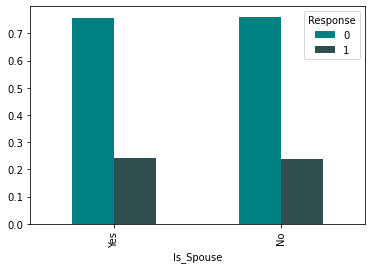

In [124]:
pd.crosstab(health['Is_Spouse'], health['Response'], normalize='index').sort_values(1, ascending = False).plot.bar(color=['teal', 'darkslategray'])
plt.show()

#### Interpretation:
- From the value counts of the 'Is_Spouse' column, we can observe that the majority of customers do not have a spouse ('No').
- Among customers who have a spouse ('Yes'), approximately 24.4% responded positively ('1'), while the remaining 75.6% responded negatively ('0').
- Among customers who do not have a spouse ('No'), approximately 23.9% responded positively ('1'), while the majority, 76.1%, responded negatively ('0').
- This information suggests that the presence or absence of a spouse may have a slight influence on the response to the health policy. Customers with a spouse tend to have a slightly higher proportion of positive responses compared to those without a spouse.

#### Health Indicator

In [125]:
health['Health Indicator'].value_counts(normalize='index').sort_values(ascending = False)

X1    0.255690
X0    0.229767
X2    0.203058
X3    0.132896
X4    0.112869
X5    0.033941
X6    0.025156
X7    0.003852
X8    0.001533
X9    0.001238
Name: Health Indicator, dtype: float64

In [126]:
pd.crosstab(health['Health Indicator'], health['Response'], normalize='index').sort_values(1, ascending = False)

Response,0,1
Health Indicator,,
X7,0.683673,0.316327
X1,0.755880,0.244120
X4,0.756921,0.243079
X2,0.758904,0.241096
X6,0.760156,0.239844
X3,0.763531,0.236469
X5,0.763752,0.236248
X0,0.765803,0.234197
X8,0.769231,0.230769


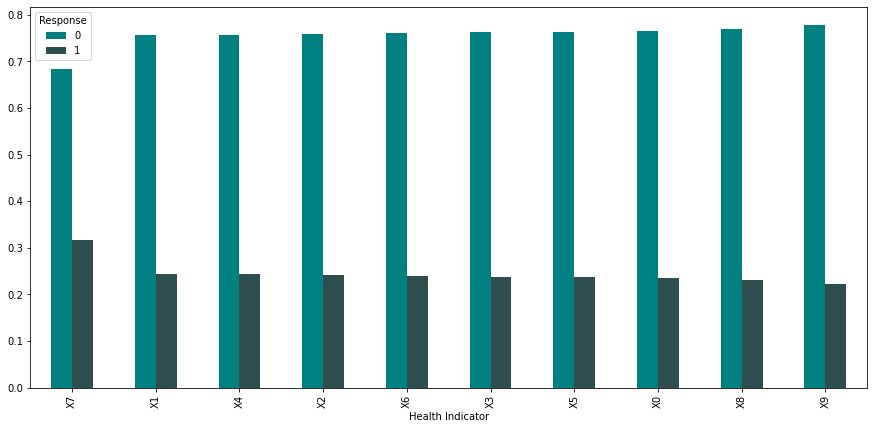

In [127]:
fig, ax = plt.subplots(figsize=(15,7))
pd.crosstab(health['Health Indicator'], health['Response'], normalize='index').sort_values(1, ascending = False).plot.bar(ax=ax,color=['teal', 'darkslategray'])
plt.show()

#### Interpretation:
- The most frequent health indicator is 'X1', accounting for approximately 25.6% of the total values.
- The 'X0' category, is the second most frequent category, making up around 22.98% but will not consider as it represents missing data.
- Other health indicators such as 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', and 'X9' have varying frequencies, with 'X2' being the third most frequent at 20.31%.

- Among the different health indicators, 'X7' has the highest proportion of positive responses ('1') at approximately 31.6%.
- The health indicators 'X1', 'X4', 'X2', 'X6', 'X3', 'X5', 'X0', 'X8', and 'X9' follow in descending order in terms of the proportion of positive responses.
- 'X9' has the lowest proportion of positive responses at approximately 22.2%.

- These findings suggest that the health indicator category may have some influence on the response to the health policy. Some categories show a higher proportion of positive responses, indicating that certain health indicators may be associated with a greater likelihood of interest in the health policy.

#### Holding_Policy_Duration

In [128]:
health['Holding_Policy_Duration'] = health['Holding_Policy_Duration'].astype(str)

In [129]:
health['Long_Term_Cust'] = health['Holding_Policy_Duration'].apply(lambda x: 'Yes' if x == 15 else 'No')

- creating new column 'Long_Term_Cust' from 'Holding_Policy_Duration' to segregate customers as they are with company from long term or not.

In [130]:
health['Holding_Policy_Duration'].value_counts().sort_values(ascending = False)

0     20251
1      4499
15     4335
2      4260
3      3586
4      2771
5      2362
6      1894
7      1645
8      1316
9      1114
10      813
11      546
12      513
13      511
14      466
Name: Holding_Policy_Duration, dtype: int64

In [131]:
pd.crosstab(health['Holding_Policy_Duration'], health['Response'], normalize='index').sort_values(1, ascending=False)

Response,0,1
Holding_Policy_Duration,,
10,0.726937,0.273063
13,0.729941,0.270059
7,0.742857,0.257143
8,0.743161,0.256839
12,0.746589,0.253411
11,0.749084,0.250916
15,0.749250,0.250750
14,0.753219,0.246781
4,0.759293,0.240707


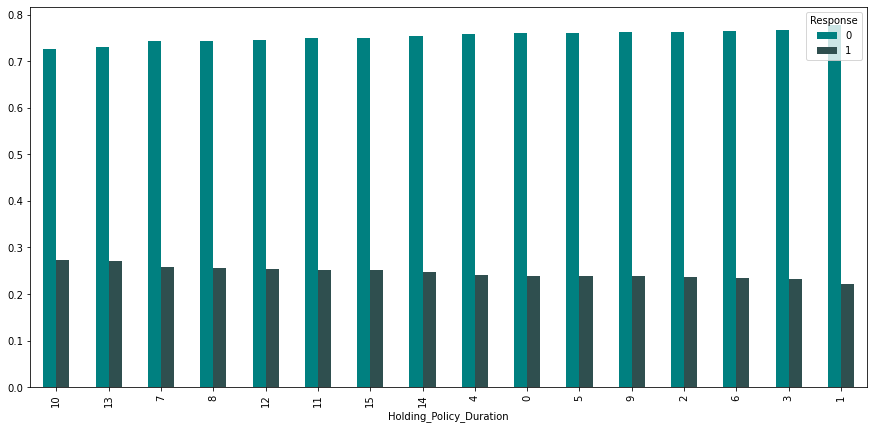

In [132]:
fig, ax = plt.subplots(figsize=(15,7))
pd.crosstab(health['Holding_Policy_Duration'], health['Response'], normalize='index').sort_values(1, ascending=False).plot.bar(ax=ax, color=['teal', 'darkslategray'])
plt.show()

#### Interpretation:
- The most common holding policy duration is '0', with a count of 20,251 but will not consider as it represents missing data.
- The '1' category, is the second most frequent category, with a count of 4499.
- Other durations such as '15', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', and '14' have varying frequencies, with '15' having the third-highest count of 4,499.
- Among the different policy durations, '10' has the highest proportion of positive responses ('1') at approximately 27.3%.
- The policy durations '13', '7', '8', '12', '11', '15', '14', '4', '0', '5', '9', '2', '6', '3', and '1' follow in descending order in terms of the proportion of positive responses.
- '1' has the lowest proportion of positive responses at approximately 22.2%.
- These findings suggest that the duration of the holding policy may have some influence on the response to the health policy. Certain durations appear to be associated with a higher proportion of positive responses, indicating that policyholders with those durations may be more interested in the health policy.

In [133]:
health['Long_Term_Cust'].value_counts()

No    50882
Name: Long_Term_Cust, dtype: int64

In [134]:
pd.crosstab(health['Long_Term_Cust'], health['Response'], normalize='index').sort_values(1, ascending=False)

Response,0,1
Long_Term_Cust,,
No,0.760053,0.239947


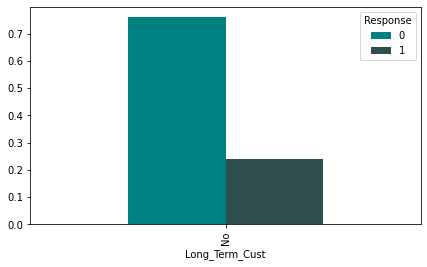

In [135]:
fig, ax = plt.subplots(figsize=(7,4))
pd.crosstab(health['Long_Term_Cust'], health['Response'], normalize='index').sort_values(1, ascending=False).plot.bar(ax=ax, color=['teal', 'darkslategray'])
plt.show()

#### Interpretation:
- The majority of customers, 46,547 in total, are classified as "No" for long-term customers.
- There are 4,335 customers classified as "Yes" for long-term customers.
- Among the long-term customers, approximately 25.1% responded positively ('1') to the health policy proposal.
- Among the non-long-term customers, approximately 23.9% responded positively to the health policy proposal
- In short, the analysis indicates that customers classified as long-term customers have a slightly higher proportion of positive responses to the health policy proposal compared to non-long-term customers

#### Holding_Policy_Type

In [136]:
health['Holding_Policy_Type'].value_counts().sort_values(ascending = False)

0.0    20251
3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [137]:
pd.crosstab(health['Holding_Policy_Type'], health['Response'], normalize='index').sort_values(1, ascending=False)

Response,0,1
Holding_Policy_Type,,
4.0,0.751797,0.248203
3.0,0.757738,0.242262
0.0,0.761049,0.238951
2.0,0.762238,0.237762
1.0,0.764224,0.235776


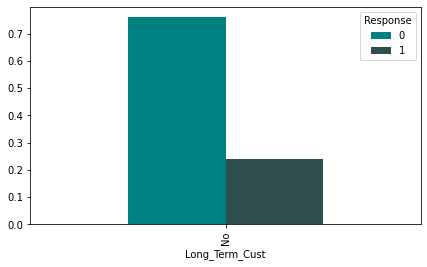

In [138]:
fig, ax = plt.subplots(figsize=(7,4))
pd.crosstab(health['Long_Term_Cust'], health['Response'], normalize='index').sort_values(1, ascending=False).plot.bar(ax=ax, color=['teal', 'darkslategray'])
plt.show()

#### Interpretation:
- The most common holding policy type is '0.0', with a count of 20,251 but will not consider as it represents missing data.
- The '3' category, is the second most frequent category, with a count of 13279.
- Other policy types such as '1.0', '2.0', and '4.0' have varying frequencies.

- Among the different policy types, '4.0' has the highest proportion of positive responses ('1') at approximately 24.8%.
- '1.0' has the lowest proportion of positive responses at approximately 23.6%.
- These findings suggest that the type of holding policy may have some influence on the response to the health policy.

#### Reco_Policy_Cat

In [139]:
health['Reco_Policy_Cat'] = health['Reco_Policy_Cat'].astype(str)

In [140]:
health['Reco_Policy_Cat'].value_counts().sort_values(ascending = False)

22    6602
18    5553
21    5027
16    4084
17    3756
19    3708
20    3177
12    2168
1     1967
2     1917
14    1742
13    1684
15    1615
3     1059
4     1015
5     1007
6      851
7      834
9      789
11     781
8      776
10     770
Name: Reco_Policy_Cat, dtype: int64

In [141]:
pd.crosstab(health['Reco_Policy_Cat'], health['Response'], normalize='index').sort_values(1, ascending=False)

Response,0,1
Reco_Policy_Cat,,
15,0.534365,0.465635
22,0.671615,0.328385
12,0.684963,0.315037
17,0.701544,0.298456
5,0.709037,0.290963
19,0.723031,0.276969
8,0.730670,0.269330
20,0.745042,0.254958
14,0.756028,0.243972


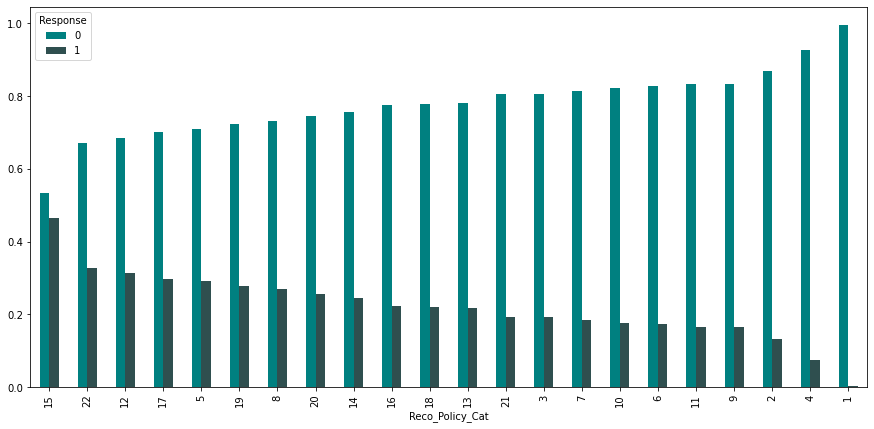

In [142]:
fig, ax = plt.subplots(figsize=(15,7))
pd.crosstab(health['Reco_Policy_Cat'], health['Response'], normalize='index').sort_values(1, ascending=False).plot.bar(ax=ax, color=['teal', 'darkslategray'])
plt.show()

#### Interpretation:
- The most common policy category is '22', with a count of 6,602.
- Other policy categories such as '18', '21', '16', '17', '19', '20', and so on, have varying frequencies.
- Among the different policy categories, category '15' has the highest proportion of positive responses ('1') at approximately 46.6%.
- Category '22' has the second-highest count but a relatively lower proportion of positive responses at approximately 32.8%.
- These findings suggest that the recommended policy category may have an influence on the response to the health policy. Certain policy categories, such as '15', show a higher proportion of positive responses, indicating that customers recommended those categories may be more interested in the health policy.

#### Reco_Policy_Premium

In [143]:
health['Reco_Policy_Premium'].describe()

count    50882.000000
mean     14183.950069
std       6590.074873
min       2280.000000
25%       9248.000000
50%      13178.000000
75%      18096.000000
max      43350.400000
Name: Reco_Policy_Premium, dtype: float64

<AxesSubplot:xlabel='Reco_Policy_Premium'>

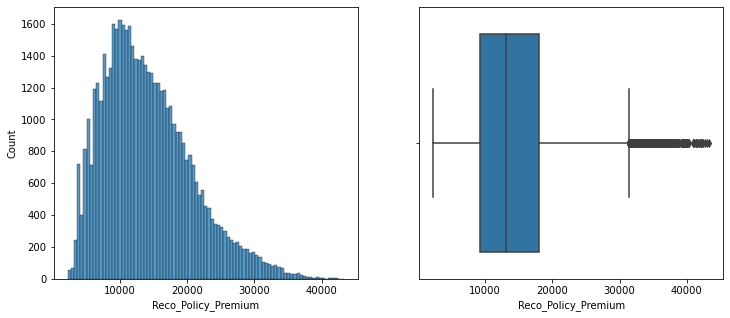

In [144]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(health['Reco_Policy_Premium'])
plt.subplot(1,2,2)
sns.boxplot(health['Reco_Policy_Premium'])

In [145]:
health.groupby(['Response'])['Reco_Policy_Premium'].mean()

Response
0    14154.537827
1    14277.115734
Name: Reco_Policy_Premium, dtype: float64

#### Interpretation:
- Average Reco_Policy_Premium value is 14,183.95
- minimum premium amount is 2,280.
- maximum premium amount is 43,350.4.
- For customers with a 'Response' value of 0, the average 'Reco_Policy_Premium' is approximately 14,154.54. This suggests that customers who did not respond favorably may have slightly lower average premiums.
- For customers with a 'Response' value of 1, the average 'Reco_Policy_Premium' is approximately 14,277.12. This indicates that customers who responded favorably may have slightly higher average premiums

- histplot shows skewness in the data and boxplot helps in identifying ouliers so, one approach to handle them is by applying binning.
- Binning involves grouping the continuous data into distinct categories or bins. This helps in simplifying the data distribution and facilitates better analysis and visualization, enabling the detection and handling of outliers.

In [146]:
health['Premium_bins'] = health['Reco_Policy_Premium'].apply(lambda x: '0-9999' if x < 10000
                                                     else '10000-14999' if x < 15000 
                                                     else '15000-19999' if x < 20000 
                                                     else '20000-24999' if x < 25000 
                                                     else '25000-29999' if x < 30000 
                                                     else '30000+')

In [147]:
health['Premium_bins'].value_counts().sort_values(ascending = False)

0-9999         15280
10000-14999    15271
15000-19999    11153
20000-24999     5521
25000-29999     2426
30000+          1231
Name: Premium_bins, dtype: int64

In [148]:
pd.crosstab(health['Premium_bins'], health['Response'], normalize='index').sort_values(1, ascending=False)

Response,0,1
Premium_bins,,
25000-29999,0.751855,0.248145
15000-19999,0.754954,0.245046
30000+,0.756296,0.243704
20000-24999,0.758558,0.241442
0-9999,0.761649,0.238351
10000-14999,0.764325,0.235675


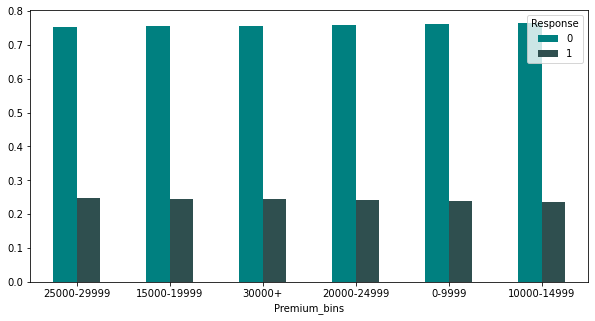

In [149]:
fig, ax = plt.subplots(figsize=(10,5))
pd.crosstab(health['Premium_bins'], health['Response'], normalize='index').sort_values(1, ascending=False).plot.bar(ax=ax, color=['teal', 'darkslategray'])
plt.xticks(rotation='horizontal')
plt.show()

#### Interpretation:
- The most common premium range is '0-9999', followed closely by '10000-14999'.
- The premium range '15000-19999' has a relatively high count as well.
- The higher premium ranges, such as '20000-24999', '25000-29999', and '30000+', have progressively lower counts.
- The premium range '25000-29999' has the highest proportion of positive responses (1).
- The premium range '0-9999' has the highest proportion of negative responses (0).
- Overall, as the premium range increases, the proportion of positive responses tends to decrease.

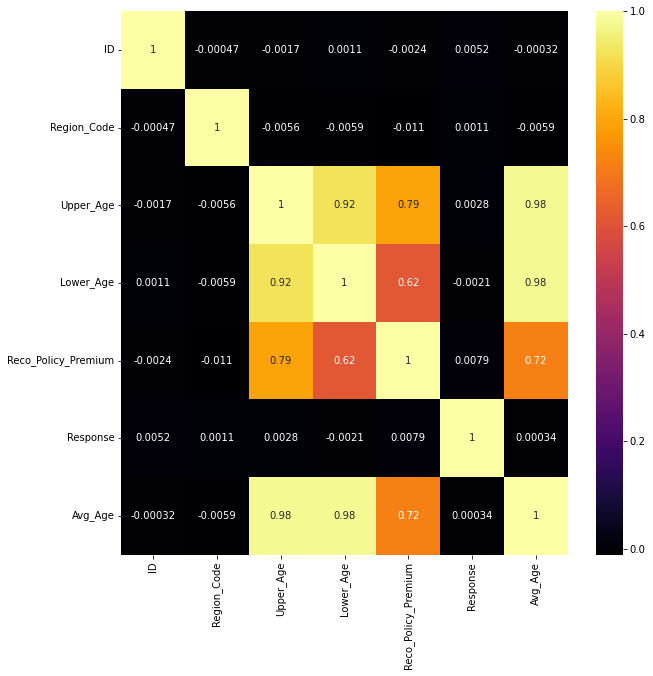

In [150]:
plt.figure(figsize=(10,10))
sns.heatmap(health.corr(), annot=True, cmap='inferno')
plt.show()

#### Feature selection

In [151]:
health.drop(['ID','Region_Code','Upper_Age','Lower_Age'],axis=1,inplace=True)

To simplify the data and improve efficiency, the unique 'ID' and 'Region Code' columns will be dropped. 'Region Code' contains numerous categorical values that would require extensive one-hot encoding. Since the 'City Code' feature already captures geographical information to some extent.

In [152]:
print(len(health.columns))
health.columns

13


Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response', 'Avg_Age',
       'Long_Term_Cust', 'Premium_bins'],
      dtype='object')

#### Separating out numerical columns
- to scale data

In [153]:
num_col = []
for i in health.columns:
    if health[i].dtype == 'float64' or health[i].dtype == 'int64':
        num_col.append(i)
    else:
        pass

print(len(num_col))    
print(num_col)

3
['Reco_Policy_Premium', 'Response', 'Avg_Age']


#### Separating out categorical columns
- to do encoding 

In [154]:
cat_col = []
for i in health.columns:
    if health[i].dtype == 'object':
        cat_col.append(i)
    else:
        pass

print(len(cat_col))    
print(cat_col)

10
['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Long_Term_Cust', 'Premium_bins']


In [155]:
#creating copy of original dataframe
health_c = health.copy()

In [156]:
print(health_c.shape)
health_c.head(2)

(50882, 13)


,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Avg_Age,Long_Term_Cust,Premium_bins
0,C3,Rented,Individual,No,X1,15,3.0,22,11628.0,0,36.0,No,10000-14999
1,C5,Owned,Joint,No,X2,0,0.0,22,30510.0,0,48.5,No,30000+


#### Defining X and Y

In [157]:
x = health_c.drop('Response', axis=1)
y = health_c.Response

In [158]:
print('shape of x data:', x.shape)
x.head(2)

shape of x data: (50882, 12)


,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Avg_Age,Long_Term_Cust,Premium_bins
0,C3,Rented,Individual,No,X1,15,3.0,22,11628.0,36.0,No,10000-14999
1,C5,Owned,Joint,No,X2,0,0.0,22,30510.0,48.5,No,30000+


In [159]:
print('shape of y data:',y.shape)
y.head(2)

shape of y data: (50882,)


0    0
1    0
Name: Response, dtype: int64

#### Tranformation of data
- Apply scaling and encoding transformations data using column transformer

In [160]:
#import necessary modules
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Define the transformers for each type of transformation
ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()

In [161]:
#Identify the columns that require each transformation
scale_cols = ['Reco_Policy_Premium', 'Avg_Age']
ohe_cols = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Long_Term_Cust', 'Premium_bins']

In [162]:
#create column transformer
transformer = ColumnTransformer(
    transformers=[
        ('scale', scaler, scale_cols),
        ('one_hot_encode', ohe, ohe_cols),
    ],
    remainder='passthrough'
)

In [163]:
#Apply the transformations and get the transformed data
t_x = transformer.fit_transform(x)
print(t_x.shape)

(50882, 94)


In [164]:
ohe_col = list(transformer.named_transformers_['one_hot_encode'].get_feature_names(ohe_cols))
ohe_col

['City_Code_C10',
 'City_Code_C11',
 'City_Code_C12',
 'City_Code_C13',
 'City_Code_C14',
 'City_Code_C15',
 'City_Code_C16',
 'City_Code_C17',
 'City_Code_C18',
 'City_Code_C19',
 'City_Code_C2',
 'City_Code_C20',
 'City_Code_C21',
 'City_Code_C22',
 'City_Code_C23',
 'City_Code_C24',
 'City_Code_C25',
 'City_Code_C26',
 'City_Code_C27',
 'City_Code_C28',
 'City_Code_C29',
 'City_Code_C3',
 'City_Code_C30',
 'City_Code_C31',
 'City_Code_C32',
 'City_Code_C33',
 'City_Code_C34',
 'City_Code_C35',
 'City_Code_C36',
 'City_Code_C4',
 'City_Code_C5',
 'City_Code_C6',
 'City_Code_C7',
 'City_Code_C8',
 'City_Code_C9',
 'Accomodation_Type_Rented',
 'Reco_Insurance_Type_Joint',
 'Is_Spouse_Yes',
 'Health Indicator_X1',
 'Health Indicator_X2',
 'Health Indicator_X3',
 'Health Indicator_X4',
 'Health Indicator_X5',
 'Health Indicator_X6',
 'Health Indicator_X7',
 'Health Indicator_X8',
 'Health Indicator_X9',
 'Holding_Policy_Duration_1',
 'Holding_Policy_Duration_10',
 'Holding_Policy_Duratio

In [165]:
all_col = ohe_col+scale_cols
all_col

['City_Code_C10',
 'City_Code_C11',
 'City_Code_C12',
 'City_Code_C13',
 'City_Code_C14',
 'City_Code_C15',
 'City_Code_C16',
 'City_Code_C17',
 'City_Code_C18',
 'City_Code_C19',
 'City_Code_C2',
 'City_Code_C20',
 'City_Code_C21',
 'City_Code_C22',
 'City_Code_C23',
 'City_Code_C24',
 'City_Code_C25',
 'City_Code_C26',
 'City_Code_C27',
 'City_Code_C28',
 'City_Code_C29',
 'City_Code_C3',
 'City_Code_C30',
 'City_Code_C31',
 'City_Code_C32',
 'City_Code_C33',
 'City_Code_C34',
 'City_Code_C35',
 'City_Code_C36',
 'City_Code_C4',
 'City_Code_C5',
 'City_Code_C6',
 'City_Code_C7',
 'City_Code_C8',
 'City_Code_C9',
 'Accomodation_Type_Rented',
 'Reco_Insurance_Type_Joint',
 'Is_Spouse_Yes',
 'Health Indicator_X1',
 'Health Indicator_X2',
 'Health Indicator_X3',
 'Health Indicator_X4',
 'Health Indicator_X5',
 'Health Indicator_X6',
 'Health Indicator_X7',
 'Health Indicator_X8',
 'Health Indicator_X9',
 'Holding_Policy_Duration_1',
 'Holding_Policy_Duration_10',
 'Holding_Policy_Duratio

In [166]:
# Convert sparse matrix to NumPy array
t_x_array = t_x.toarray()

In [167]:
trans_df_x = pd.DataFrame(t_x_array, columns=all_col)

In [168]:
trans_df_x.head(2)

,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Holding_Policy_Duration_1,Holding_Policy_Duration_10,Holding_Policy_Duration_11,Holding_Policy_Duration_12,Holding_Policy_Duration_13,Holding_Policy_Duration_14,Holding_Policy_Duration_15,Holding_Policy_Duration_2,Holding_Policy_Duration_3,Holding_Policy_Duration_4,Holding_Policy_Duration_5,Holding_Policy_Duration_6,Holding_Policy_Duration_7,Holding_Policy_Duration_8,Holding_Policy_Duration_9,Holding_Policy_Type_1.0,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Reco_Policy_Cat_10,Reco_Policy_Cat_11,Reco_Policy_Cat_12,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_2,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22,Reco_Policy_Cat_3,Reco_Policy_Cat_4,Reco_Policy_Cat_5,Reco_Policy_Cat_6,Reco_Policy_Cat_7,Reco_Policy_Cat_8,Reco_Policy_Cat_9,Premium_bins_10000-14999,Premium_bins_15000-19999,Premium_bins_20000-24999,Premium_bins_25000-29999,Premium_bins_30000+,Reco_Policy_Premium,Avg_Age
0,-0.387852,-0.459465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.477394,0.277087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


- because data is imbalanced so will synthesize the data

In [169]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42)

print('Original dataset shape %s' % Counter(y))

x_res, y_res = smote.fit_resample(trans_df_x, y)
print('After undersample dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 38673, 1: 12209})
After undersample dataset shape Counter({0: 38673, 1: 38673})


#### Splitting the data into Train and Test

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state = 0, stratify=y_res)

In [172]:
print('shape of x_train',x_train.shape)
print('shape of x_test',x_test.shape)
print('shape of y_train',y_train.shape)
print('shape of y_test',y_test.shape)

shape of x_train (61876, 94)
shape of x_test (15470, 94)
shape of y_train (61876,)
shape of y_test (15470,)


In [173]:
print('new y_train:', y_train.value_counts(normalize=True)*100, 'new y_test:', y_test.value_counts(normalize=True)*100, sep='/n')

new y_train:/n1    50.0
0    50.0
Name: Response, dtype: float64/nnew y_test:/n1    50.0
0    50.0
Name: Response, dtype: float64


In [174]:
print('new y_train:')
print(y_train.value_counts(normalize=True)*100)
print('new y_test:')
print(y_test.value_counts(normalize=True)*100)

new y_train:
1    50.0
0    50.0
Name: Response, dtype: float64
new y_test:
1    50.0
0    50.0
Name: Response, dtype: float64


#### Model development and evaluation
- we will use various models for comparison

In [175]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#evaluation matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [176]:
# Initializing models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

#### Logistic Regression

In [177]:
# # Fit the model on train data
# lr.fit(x_train,y_train)

# # Make predictions using train data
# y_pred_train = lr.predict(x_train)
# # Make predictions using test data
# y_pred_test = lr.predict(x_test)

In [178]:
# # Calculate accuracy score
# train_accuracy = accuracy_score(y_train, y_pred_train)
# test_accuracy = accuracy_score(y_test, y_pred_test)

# print("Train Accuracy:", train_accuracy)
# print("Test Accuracy:", test_accuracy)

# print('-'*120)

# # Calculate F1 score
# train_f1_score = f1_score(y_train, y_pred_train)
# test_f1_score = f1_score(y_test, y_pred_test)

# print("Train F1 Score:", train_f1_score)
# print("Test F1 Score:", test_f1_score)

# print('-'*120)

# # Calculate confusion matrix
# train_confusion_matrix = confusion_matrix(y_train, y_pred_train)
# test_confusion_matrix = confusion_matrix(y_test, y_pred_test)

# print("Train Confusion Matrix:")
# print(train_confusion_matrix)
# print("Test Confusion Matrix:")
# print(test_confusion_matrix)

#### Decision Tree Classifier

In [179]:
# # Fit the model on train data
# dt.fit(x_train,y_train)

# # Make predictions using train data
# y_pred_train = dt.predict(x_train)
# # Make predictions using test data
# y_pred_test = dt.predict(x_test)

In [180]:
# # Calculate accuracy score
# train_accuracy = accuracy_score(y_train, y_pred_train)
# test_accuracy = accuracy_score(y_test, y_pred_test)

# print("Train Accuracy:", train_accuracy)
# print("Test Accuracy:", test_accuracy)

# print('-'*120)

# # Calculate F1 score
# train_f1_score = f1_score(y_train, y_pred_train)
# test_f1_score = f1_score(y_test, y_pred_test)

# print("Train F1 Score:", train_f1_score)
# print("Test F1 Score:", test_f1_score)

# print('-'*120)

# # Calculate confusion matrix
# train_confusion_matrix = confusion_matrix(y_train, y_pred_train)
# test_confusion_matrix = confusion_matrix(y_test, y_pred_test)

# print("Train Confusion Matrix:")
# print(train_confusion_matrix)
# print("Test Confusion Matrix:")
# print(test_confusion_matrix)

#### Random Forest

In [181]:
# # Fit the model on train data
# rf.fit(x_train,y_train)

# # Make predictions using train data
# y_pred_train = rf.predict(x_train)
# # Make predictions using test data
# y_pred_test = rf.predict(x_test)

In [182]:
# # Calculate accuracy score
# train_accuracy = accuracy_score(y_train, y_pred_train)
# test_accuracy = accuracy_score(y_test, y_pred_test)

# print("Train Accuracy:", train_accuracy)
# print("Test Accuracy:", test_accuracy)

# print('-'*120)

# # Calculate F1 score
# train_f1_score = f1_score(y_train, y_pred_train)
# test_f1_score = f1_score(y_test, y_pred_test)

# print("Train F1 Score:", train_f1_score)
# print("Test F1 Score:", test_f1_score)

# print('-'*120)

# # Calculate confusion matrix
# train_confusion_matrix = confusion_matrix(y_train, y_pred_train)
# test_confusion_matrix = confusion_matrix(y_test, y_pred_test)

# print("Train Confusion Matrix:")
# print(train_confusion_matrix)
# print("Test Confusion Matrix:")
# print(test_confusion_matrix)

#### Xgboost

In [183]:
# # Fit the model on train data
# xgb.fit(x_train,y_train)

# # Make predictions using train data
# y_pred_train = xgb.predict(x_train)
# # Make predictions using test data
# y_pred_test = xgb.predict(x_test)

In [184]:
# # Calculate accuracy score
# train_accuracy = accuracy_score(y_train, y_pred_train)
# test_accuracy = accuracy_score(y_test, y_pred_test)

# print("Train Accuracy:", train_accuracy)
# print("Test Accuracy:", test_accuracy)

# print('-'*120)

# # Calculate F1 score
# train_f1_score = f1_score(y_train, y_pred_train)
# test_f1_score = f1_score(y_test, y_pred_test)

# print("Train F1 Score:", train_f1_score)
# print("Test F1 Score:", test_f1_score)

# print('-'*120)

# # Calculate confusion matrix
# train_confusion_matrix = confusion_matrix(y_train, y_pred_train)
# test_confusion_matrix = confusion_matrix(y_test, y_pred_test)

# print("Train Confusion Matrix:")
# print(train_confusion_matrix)
# print("Test Confusion Matrix:")
# print(test_confusion_matrix)

In [185]:
# Define the models to evaluate
models = [
    ('Logistic_Regression', lr),
    ('Random_Forest', rf),
    ('Decision_Tree', dt),
    ('XgBoost', xgb)
]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy',  'Train F1 Score', 'Test F1 Score'])

# Iterate over the models
for name, model in models:
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the training and test data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate evaluation metrics for training data
    train_accuracy = (accuracy_score(y_train, y_train_pred))*100
    train_f1 = (f1_score(y_train, y_train_pred))*100
    
    # Calculate evaluation metrics for test data
    test_accuracy = (accuracy_score(y_test, y_test_pred))*100
    test_f1 = (f1_score(y_test, y_test_pred))*100
    
#     # Store the results in the DataFrame
    results_df = results_df.append({'Model': name,
                                    'Train Accuracy': train_accuracy,
                                    'Test Accuracy': test_accuracy,
                                    'Train F1 Score': train_f1,
                                    'Test F1 Score': test_f1,}, ignore_index=True)
    
results_df.T

,0,1,2,3
Model,Logistic_Regression,Random_Forest,Decision_Tree,XgBoost
Train Accuracy,60.601849,99.998384,99.998384,84.480251
Test Accuracy,59.870718,84.5766,76.483516,82.676147
Train F1 Score,61.968799,99.998384,99.998384,82.202495
Test F1 Score,61.063723,83.699959,76.816212,80.130486


#### Observation:
- The Logistic Regression model appears to be underfitting the data since its accuracy and F1 score are relatively low for both the training and testing data. It may not be capturing the underlying patterns in the data well.
- The Decision Tree and Random Forest models seem to be overfitting the data since they have very high accuracy and F1 score on the training data, but their performance drops on the testing data. This indicates that they may have learned the training data too well and are unable to generalize well to new, unseen data.
- The XG Boost model shows a good balance between training and testing performance, with high accuracy and F1 score on both datasets. It seems to generalize well to unseen data

- Based on the bias-variance tradeoff and performance on the testing data, the XGBoost model appears to be the best model among the ones evaluated.

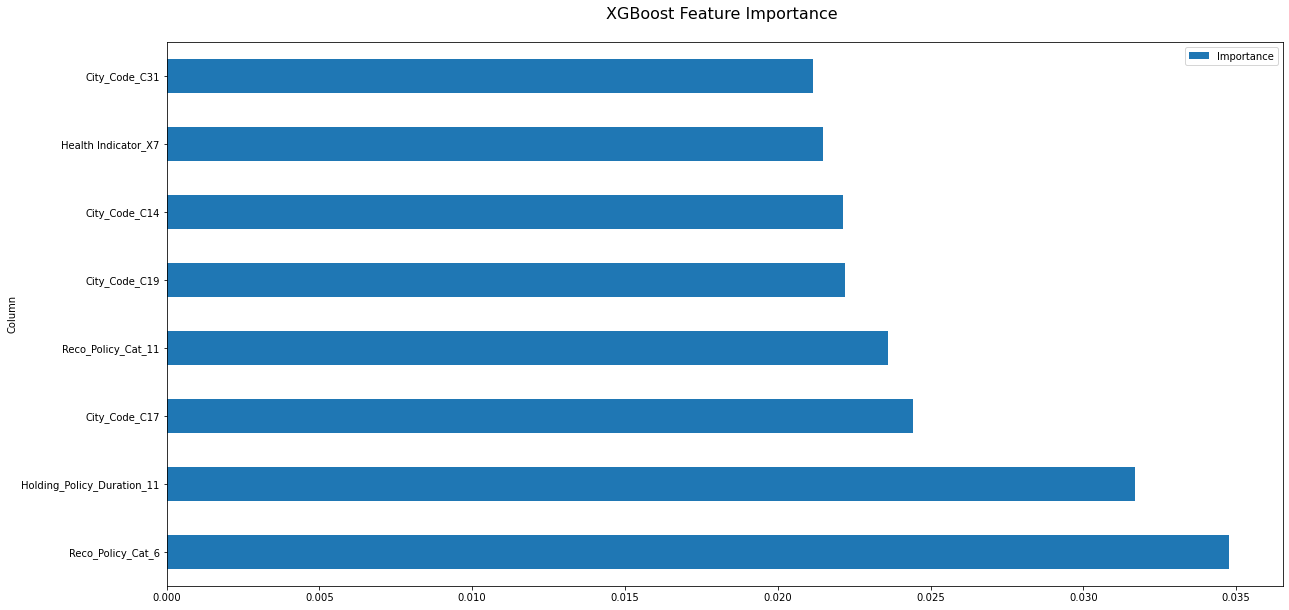

In [186]:
clf_feature = pd.DataFrame({'Importance':xgb.feature_importances_,'Column':trans_df_x.columns})
clf_feature = clf_feature.sort_values(by='Importance',ascending=False) 
clf_feature = clf_feature[:8] # top 8 features
clf_feature.plot(kind='barh',x='Column',y='Importance',figsize=(20, 10))
plt.title('XGBoost Feature Importance \n',fontsize=16)
plt.show()

#### Observation:

Based on the analysis of the models and the feature importance, the following observations can be made:

1. The dataset shows that the majority of people (76%) are not interested in the health policy, while only 24% are interested. The XGBoost model performed the best among the evaluated models, striking a balance between training and testing performance. Certain features, such as 'Reco_Policy_Cat_6', 'Holding_Policy_Duration_11', and 'City_Code_C17', were found to contribute more to the recommendation process.

2. Further analysis revealed that the city code plays a role in the response to the health policy, with certain cities having higher proportions of positive responses. The type of accommodation was also found to influence interest, with clients who own their accommodation showing a higher count of positive responses. The recommended insurance type was dominated by individual policies.

3. The age of customers did not show a significant difference between those interested and not interested in the health policy. Having a spouse seemed to have a slight influence, with customers with a spouse showing a slightly higher proportion of positive responses. The health indicator and the duration of the holding policy also showed some influence on the response.

#### Conclusion:

In conclusion, the XGBoost model is recommended as the best model for this classification task. It exhibits a good balance between bias and variance, providing good performance on both the training and testing data. The feature importance analysis provides insights into the important features that contribute to the model's predictions. Further analysis and improvements can be made by considering feature engineering, fine-tuning hyperparameters, and exploring ensemble methods to potentially enhance the model's performance.